<a href="https://colab.research.google.com/github/JunadQuasir/playstore-app-review-analysis/blob/main/junad_quasir_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is Google Play Store? Well, from the mobile standpoint, it’s an app, though it’s actually a platform. So, it’s essentially far more than that, which is something we’ll get down to in a minute. In this article, we’ll talk about the Google Play Store, and try to answer quite a few questions, most of which are quite basic. That is the point of this article, to share as much information about Google’s Play Store platform as possible. So, let’s get started.

Google Play, also branded as the Google Play Store and formerly Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives as well as Chrome OS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play also serves as a digital media store, offering music, books, movies, and television programs.[2] Content that has been purchased on Google Play Movies & TV and Google Play Books can be accessed on a web browser, and through the Android and iOS apps.



Lets take a look at the data, which consist of two file



*   Play store data.csv
*   User_review



# **Import the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Gathering data**

In [ ]:
df=pd.read_csv('/content/Play Store Data.csv')
df_ur=pd.read_csv('/content/User Reviews.csv')

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df.info()
df_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

In [ ]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

#**Data cleaning**

In [ ]:
duplicate_rows =df[df.duplicated()].count()
print(f'There are total Duplicate rows \n {duplicate_rows} ')

There are total Duplicate rows 
 App                    474
Category               474
Rating                 474
Reviews                474
Size                   474
Installs               474
Type                   474
Price                  474
Content Rating         474
Genres                 474
Last Updated           474
Current Ver            474
Android Ver            474
Gaming Category App    474
dtype: int64 


In [ ]:
# Lets drop the duplicate rows
df= df[~df.duplicated()] 

In [ ]:
df[df.duplicated()].count()

App                    0
Category               0
Rating                 0
Reviews                0
Size                   0
Installs               0
Type                   0
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Android Ver            0
Gaming Category App    0
dtype: int64

**cleaning the null value and replacing with the help of mean , median , mode**

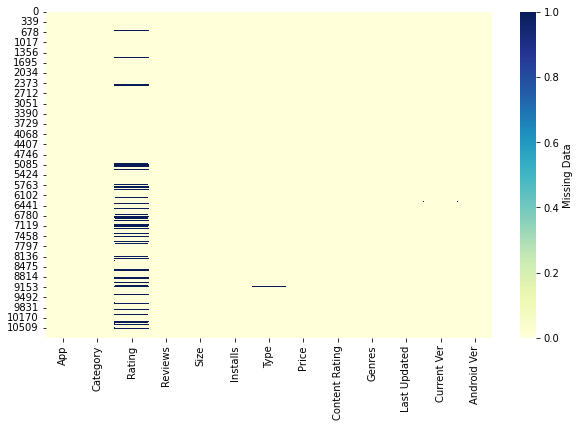

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

In [ ]:
##cleaning df
df.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [ ]:
df.Rating.isnull().sum()

0

In [ ]:
df['Size'].isna().sum()

0

In [ ]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop([10472],inplace = True)

In [ ]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [ ]:
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

In [ ]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

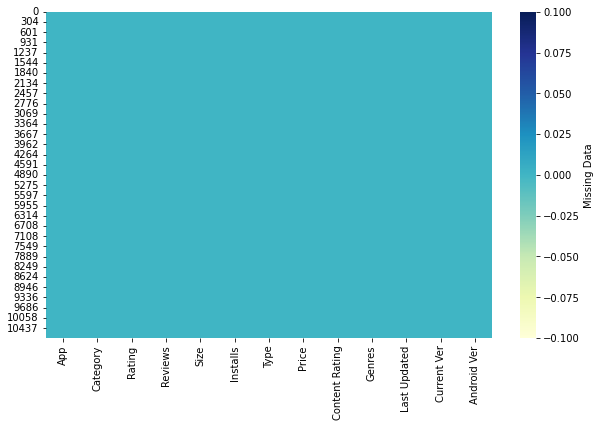

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

**Filter unwanted outliers**


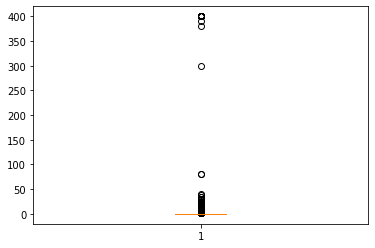

In [ ]:
## removig the outliers
plt.boxplot(df['Price'])
plt.show()

In [ ]:
df.loc[df['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [ ]:
gt_30 = df[df['Price'] > 30].index
df.drop(labels=gt_30, inplace=True)

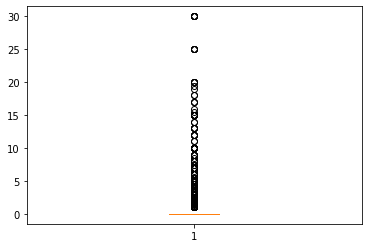

In [ ]:
plt.boxplot(df['Price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


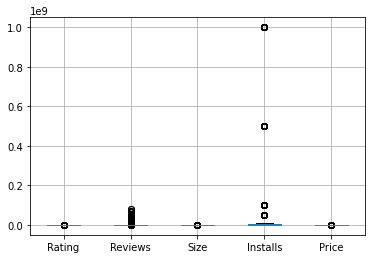

In [ ]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc88dd90550>,
      dtype=object)

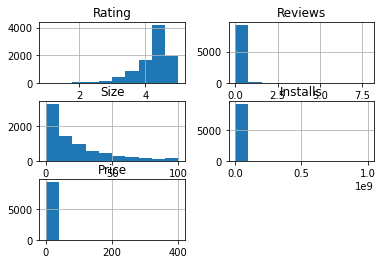

In [ ]:
df.hist()

**correcting the datatype of a column**

In [ ]:
##correcting data types
price = []
for i in df['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)  

In [ ]:
df.drop(labels=df[df['Price']=='Everyone'].index, inplace = True)
df['Price']=price
df['Price']= df['Price'].astype('float')

In [ ]:
install = []
for j in df['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

df['Installs']= install
df['Installs']= df['Installs'].astype('int')

In [ ]:
df['Reviews']= df['Reviews'].astype('int')

In [ ]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

**CO-RELATION BETWEEN COLUMNS**


In [ ]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068020,0.083745,0.051179,0.024307
Reviews,0.068020,1.000000,0.240578,0.641587,-0.028623
Size,0.083745,0.240578,1.000000,0.162822,-0.012148
Installs,0.051179,0.641587,0.162822,1.000000,-0.035344
Price,0.024307,-0.028623,-0.012148,-0.035344,1.000000


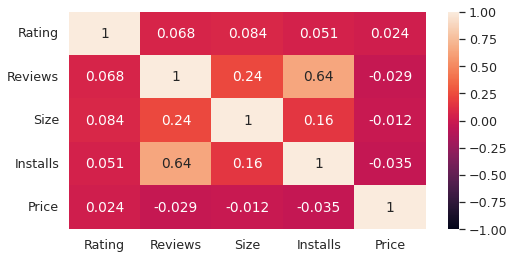

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,vmin=-1, vmax=1);

# **Exploratory Analysis and Visualization**

In [ ]:
top_genres = df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})


In [ ]:
genres_installs =df.groupby(['Genres'])[['Installs']].sum()

In [ ]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


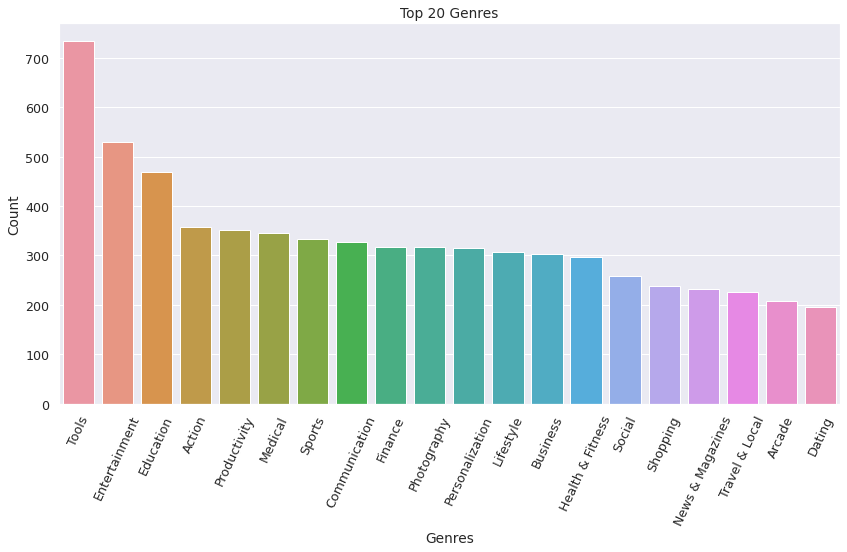

In [ ]:
#plotting and creating chaarts
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


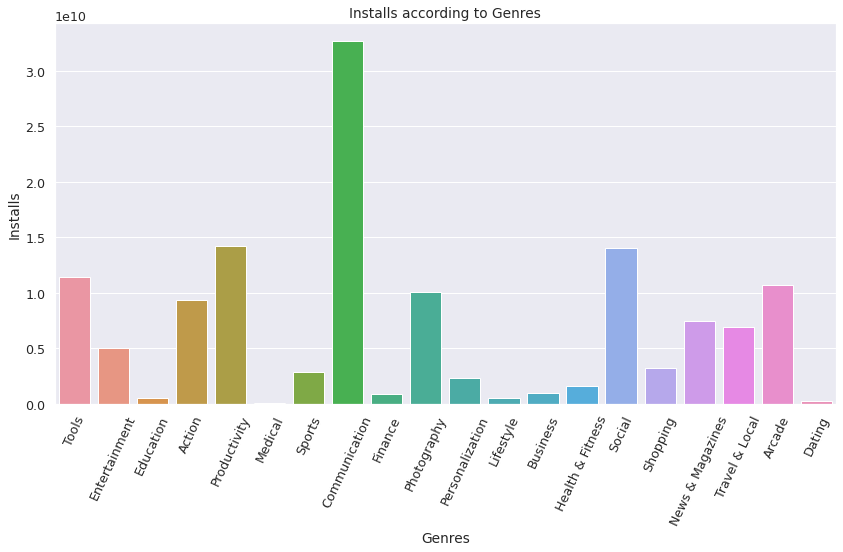

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

In [ ]:
top_category = df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [ ]:
category_installs = df.groupby(['Category'])[['Installs']].sum()

In [ ]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


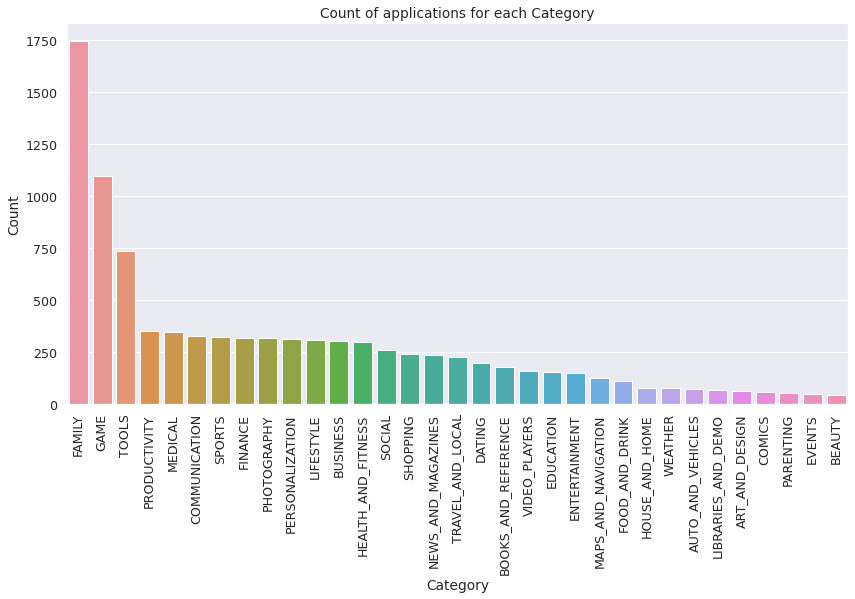

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


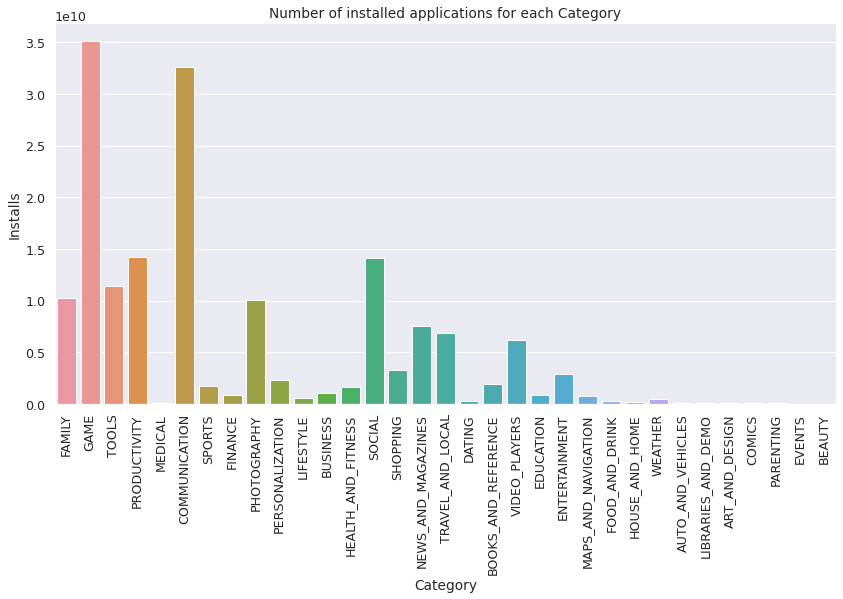

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()

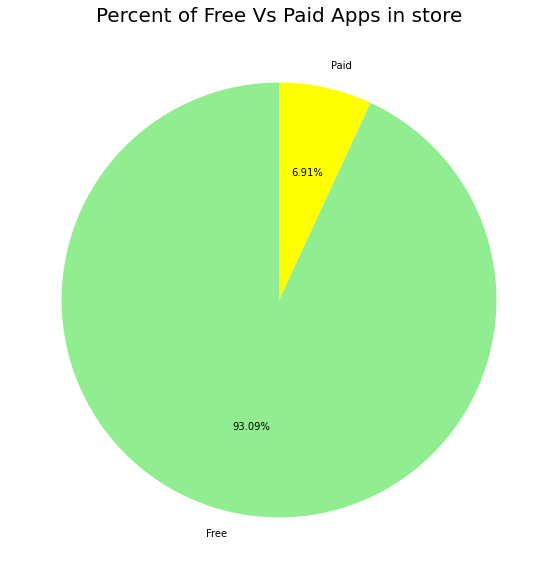

In [ ]:
## Total number of free and paid apps
plt.figure(figsize=(10,10))
labels =df['Type'].value_counts().index
sizes = df['Type'].value_counts(sort = True)
colors = ["lightgreen","yellow"]
explode = [0.2,0]
plt.pie(sizes,labels=labels, colors=colors,startangle=90,autopct="%.2f%%")
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

In [ ]:
df['Type'].value_counts()# To know the total number of free and paid apps.

Free    8279
Paid     613
Name: Type, dtype: int64

In [ ]:
#To find total number of Apps having 5 star Rating
temp = len(df[df['Rating']==5.0])
print(f'The total no. of App that have 5 star rating = {temp} ')

The total no. of App that have 5 star rating = 271 


In [ ]:
app_count = df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [ ]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

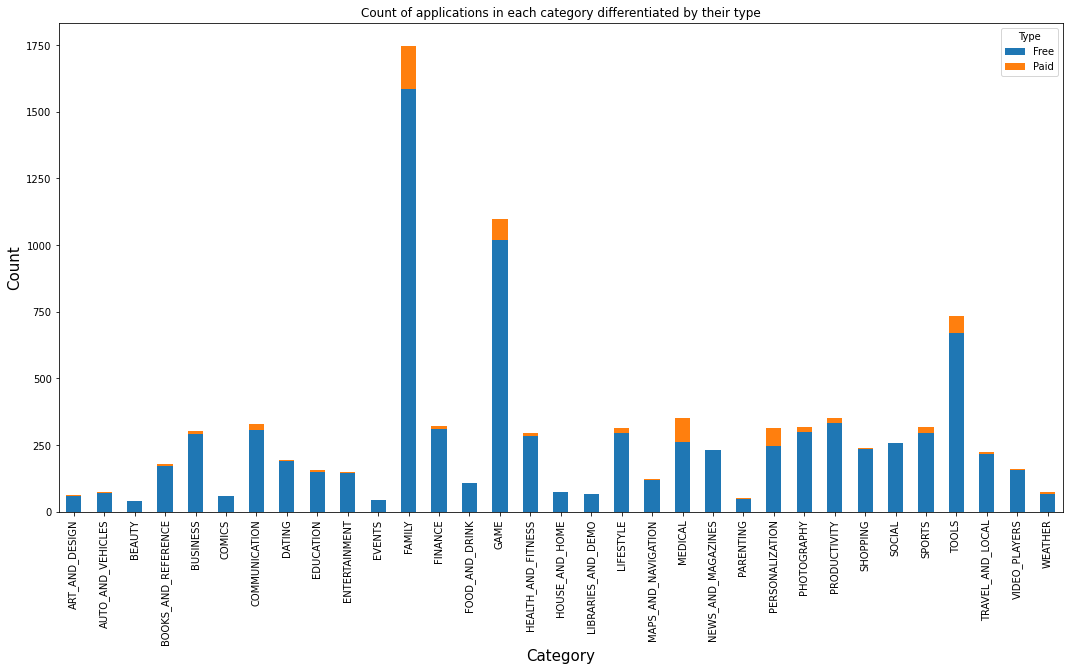

In [ ]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

In [ ]:
##The App that got highest price
temp= df['App'][df.Price==df['Price'].max()].iloc[0]
print(f'The App that have the highest price is\n{temp}')

The App that have the highest price is
I'm Rich - Trump Edition


In [ ]:
##The App that got lowest price
temp =list( df['App'][df.Price==df['Price'].min()].values)
print(f'The app that have the lowest price are {len(temp)} apps ')

The app that have the lowest price are 8279 apps 


In [ ]:
##The Average rating of free and paid apps
df.groupby('Type')['Rating'].mean()#To find the average rating of free and paid apps 

Type
Free    4.182425
Paid    4.261501
Name: Rating, dtype: float64

In [ ]:
##What are top 10 expensive app
df.sort_values(by=['Price','App'],ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Gaming Category App
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,False
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,False
4197,most expensive app (H),FAMILY,4.3,6,1.500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,False
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,False
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.700,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up,False
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,False
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,False
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,False
5369,I am Rich,FINANCE,4.3,180,3.800,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up,False
5362,I Am Rich Pro,FAMILY,4.4,201,2.700,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,False


# **Gathering data and information**

In [ ]:
df_ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_ur.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
df_ur.shape

(64295, 5)

In [ ]:
df_ur.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

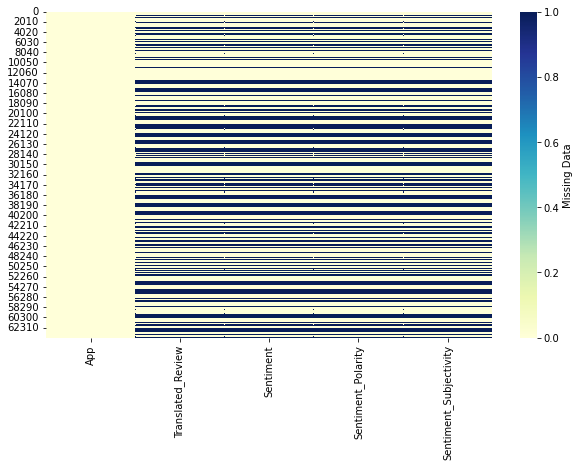

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_ur.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

**Replacing null value**

In [ ]:
df_ur.dropna(inplace=True)

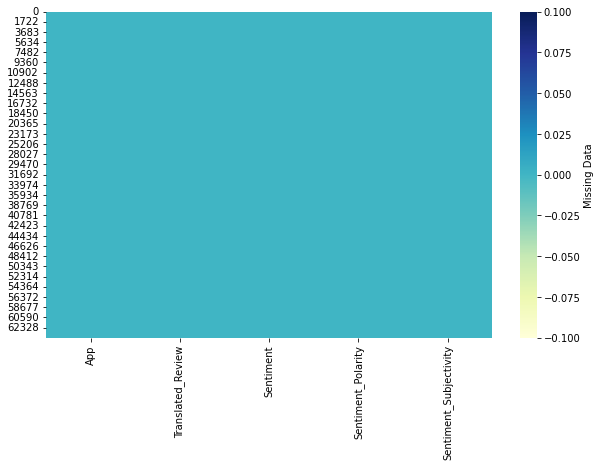

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_ur.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

In [ ]:
df_ur.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
df_ur.shape

(37427, 5)

In [ ]:
df_ur

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


# **Merging the two dataset**

In [ ]:
merged_df = df.merge(df_ur, on="App")

**Cleaning the merged dataset**

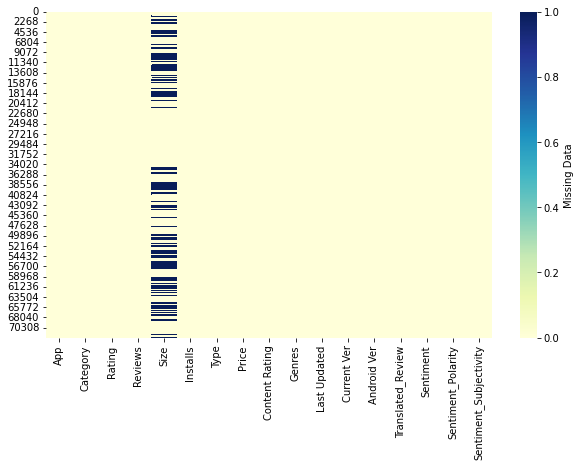

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(merged_df.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

In [ ]:
merged_df.dropna(inplace=True)

In [ ]:
merged_df.isna().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

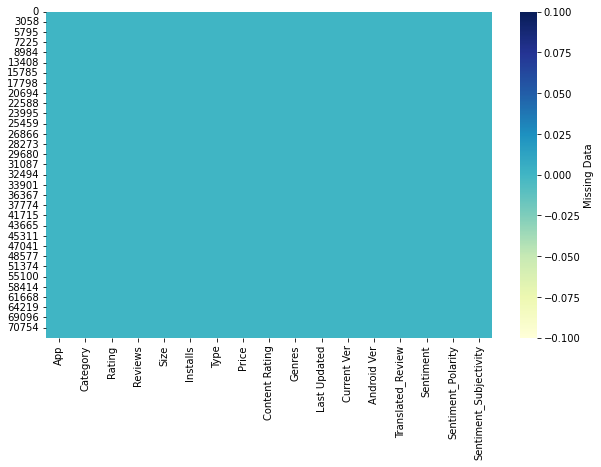

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(merged_df.isna(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})

In [ ]:
#after doing merged both table finding corelation
merged_df.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.238224,0.251542,0.013917,-0.002467,0.050870,0.071218
Reviews,0.238224,1.000000,0.538954,0.526663,-0.044727,-0.150479,-0.025160
Size,0.251542,0.538954,1.000000,0.265910,-0.038180,-0.176674,0.008357
Installs,0.013917,0.526663,0.265910,1.000000,-0.041778,-0.108866,-0.027421
Price,-0.002467,-0.044727,-0.038180,-0.041778,1.000000,0.036451,0.008110
Sentiment_Polarity,0.050870,-0.150479,-0.176674,-0.108866,0.036451,1.000000,0.234543
Sentiment_Subjectivity,0.071218,-0.025160,0.008357,-0.027421,0.008110,0.234543,1.000000


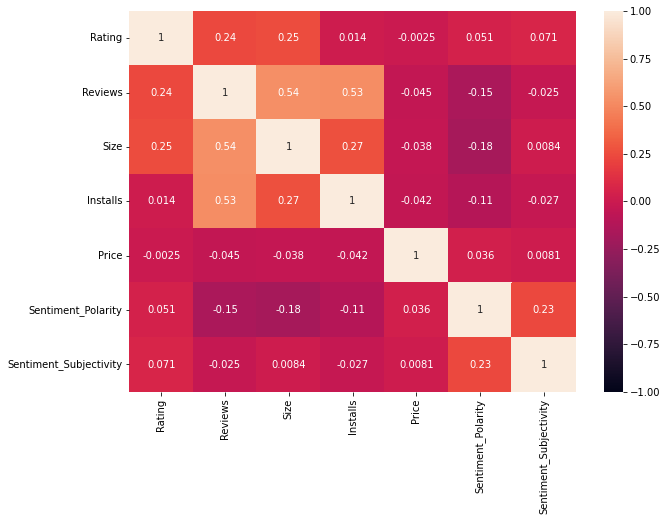

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(merged_df.corr(),annot=True,vmin=-1,vmax=1)

# **Exploratory Analysis and Visualization after merging Data set**

In [ ]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [ ]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


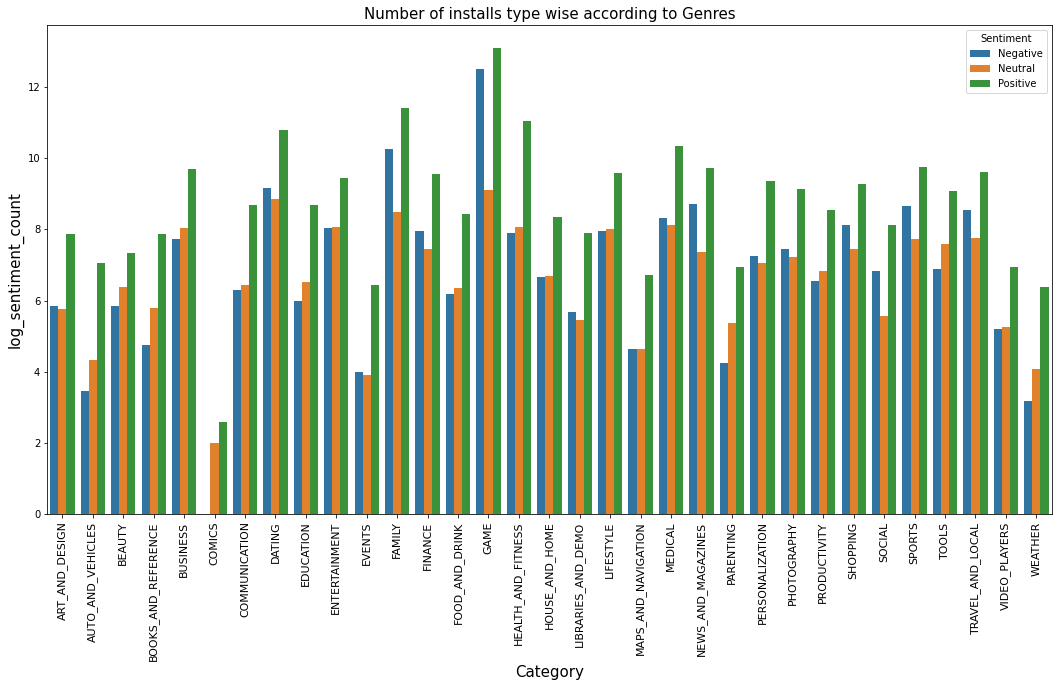

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment)

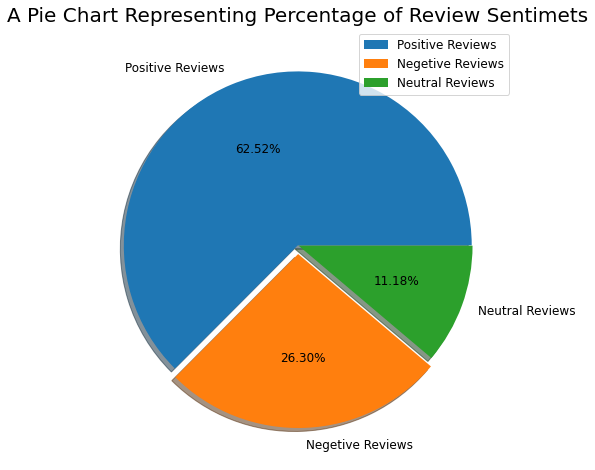

In [ ]:
import matplotlib 
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
## Distribution of App Size

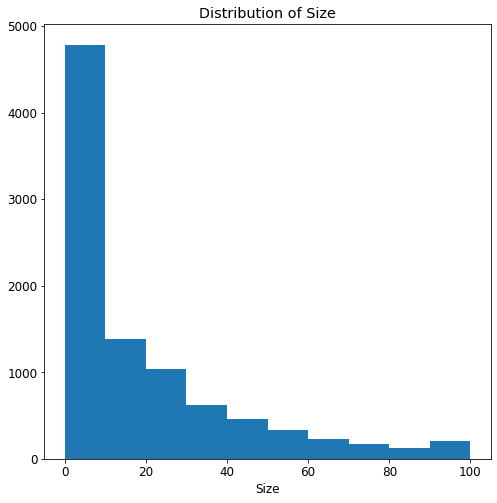

In [ ]:
df.loc[df['Size'].isnull(),'Size']=0
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(df['Size']);
plt.show()

In [ ]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [ ]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


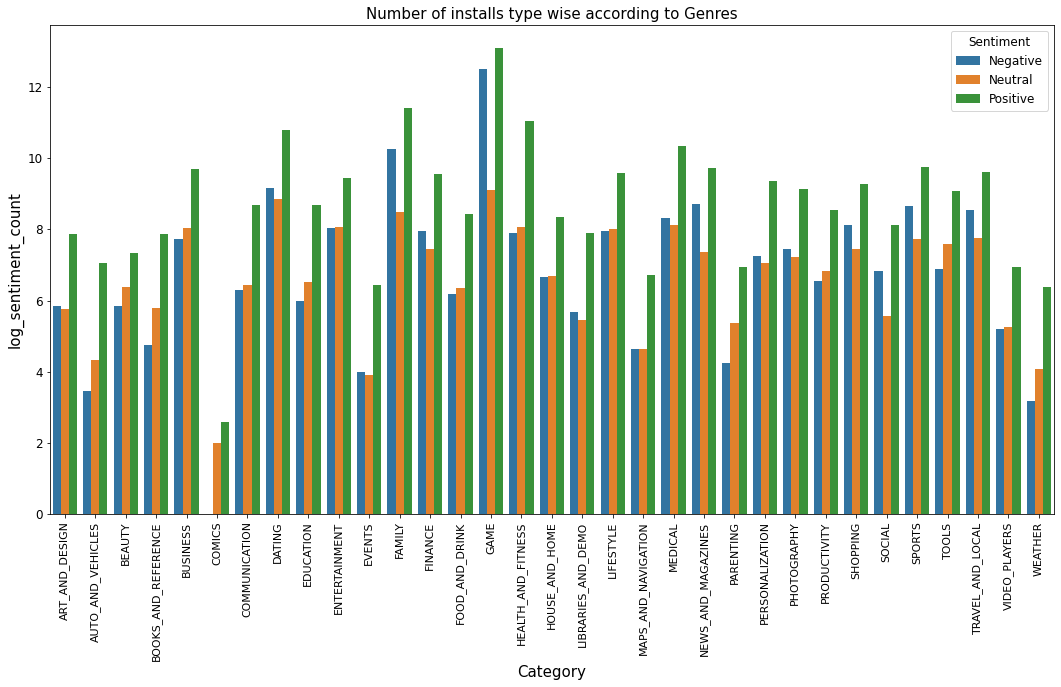

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);


In [ ]:
df['Gaming Category App'] = df['Category']=='GAME'

In [ ]:
categoty_type_installs =df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [ ]:
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


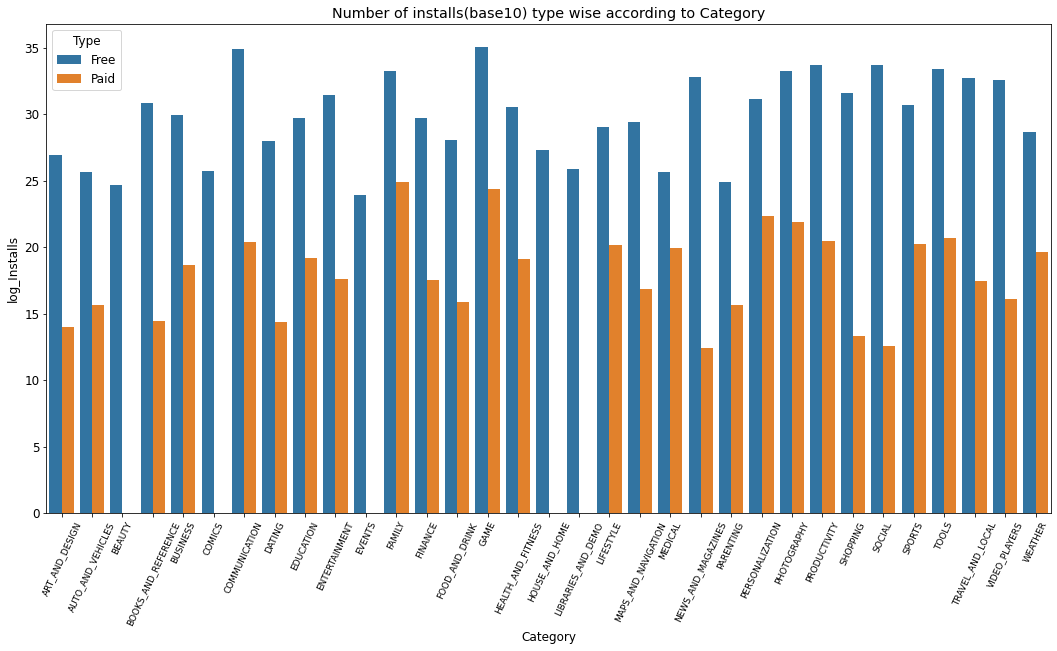

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs(base10)")
plt.title("Number of installs(base10) type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

In [ ]:
##Does sentiment_subjectivity proportional to sentiment_polarity?
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
##Distribution of Subjectivity
merged_df = df.merge(df_ur, on="App")

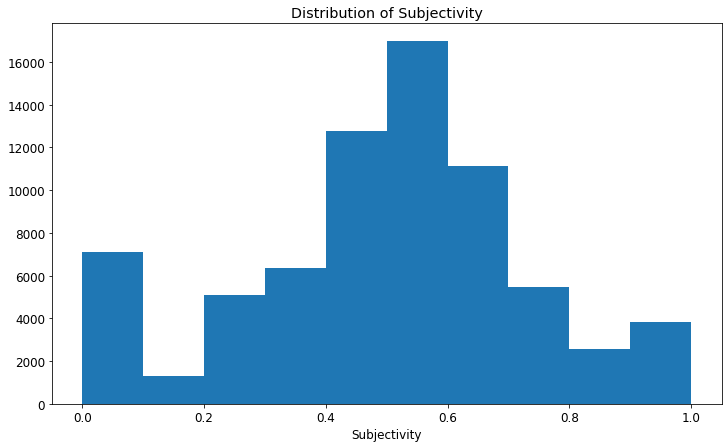

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

In [ ]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()

In [ ]:
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


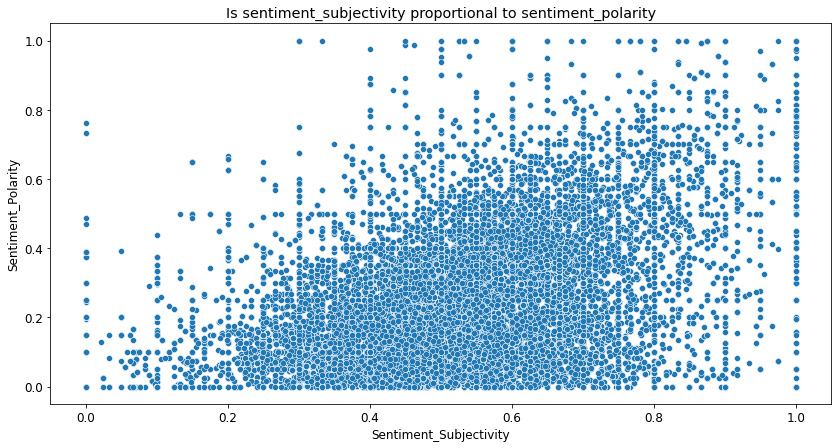

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Is sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

##Goal is to provide a better understanding of how App’s ratings and reviews measure up to the industry as a whole.
1. User mostly prefers more of free apps. Most of the apps present in playstore are more or less of same size so size doesn’t affect their decision much.
2. The apps which are available for everyone are having the ratings 4 and above out of 5.
3. Most popular category of apps are on two basis - Number of Installs and number of reviews.
4. Family, Game, Communication, Social, Tools, Medical, Events Apps are the highest earning apps and at the same time Medical, Family, game, Tools apps are the expensive apps which helps us to understand the application market and invest money in the right categories to make good profits.
5. Also, customer ratings plays a huge role while releasing the application.
6. The sentiment does not influence the final rating of the app because of the proportional behaviour.
7. Popular categories have a more positive sentiment.
8. Positive reviews are higher than negative and neutral but the sentiment subjectivity is not always proportional to sentiment polarity. 